In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from pandas.plotting import register_matplotlib_converters
from pandas_datareader import data as pdr
import scipy.stats as sst
import statsmodels.api as sm
import math

In [3]:
tickers=['ZM']
df=pd.DataFrame()

for t in tickers:
    df[t] = pdr.DataReader(t,data_source = 'yahoo',start='2019-12-2',end='2021-1-1')['Adj Close']

In [4]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 274 entries, 2019-12-02 to 2020-12-31
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ZM      274 non-null    float64
dtypes: float64(1)
memory usage: 4.3 KB
None


In [5]:
# 对比平均值和方差来看，方差并不大，说明这段时间zm的股价波动不大，震荡走势为主
print(df.describe())

               ZM
count  274.000000
mean   247.634617
std    148.219157
min     62.490002
25%    113.750000
50%    237.889999
75%    397.722496
max    568.340027


In [6]:
# 计算收盘价的20日均线
df['ma20']=df['ZM'].rolling(20).mean()
print(df)

                    ZM        ma20
Date                              
2019-12-02   68.930000         NaN
2019-12-03   70.019997         NaN
2019-12-04   69.959999         NaN
2019-12-05   69.669998         NaN
2019-12-06   62.740002         NaN
...                ...         ...
2020-12-24  375.170013  408.846999
2020-12-28  351.390015  402.836000
2020-12-29  353.750000  396.605501
2020-12-30  353.399994  393.960001
2020-12-31  337.320007  390.183002

[274 rows x 2 columns]


In [7]:
# 计算每20天收盘价的标准差
df['std20']=df['ZM'].rolling(20).std()
print(df)

                    ZM        ma20      std20
Date                                         
2019-12-02   68.930000         NaN        NaN
2019-12-03   70.019997         NaN        NaN
2019-12-04   69.959999         NaN        NaN
2019-12-05   69.669998         NaN        NaN
2019-12-06   62.740002         NaN        NaN
...                ...         ...        ...
2020-12-24  375.170013  408.846999  24.850780
2020-12-28  351.390015  402.836000  23.365669
2020-12-29  353.750000  396.605501  18.212655
2020-12-30  353.399994  393.960001  20.435883
2020-12-31  337.320007  390.183002  23.508616

[274 rows x 3 columns]


In [8]:
# 用20日均线+2倍标准差，得到boll上轨
df['up']=df['std20']*2+df['ma20']
print(df)

                    ZM        ma20      std20          up
Date                                                     
2019-12-02   68.930000         NaN        NaN         NaN
2019-12-03   70.019997         NaN        NaN         NaN
2019-12-04   69.959999         NaN        NaN         NaN
2019-12-05   69.669998         NaN        NaN         NaN
2019-12-06   62.740002         NaN        NaN         NaN
...                ...         ...        ...         ...
2020-12-24  375.170013  408.846999  24.850780  458.548559
2020-12-28  351.390015  402.836000  23.365669  449.567337
2020-12-29  353.750000  396.605501  18.212655  433.030811
2020-12-30  353.399994  393.960001  20.435883  434.831766
2020-12-31  337.320007  390.183002  23.508616  437.200234

[274 rows x 4 columns]


In [9]:
df['down']=df['ma20']-df['std20']*2
print(df)

                    ZM        ma20      std20          up        down
Date                                                                 
2019-12-02   68.930000         NaN        NaN         NaN         NaN
2019-12-03   70.019997         NaN        NaN         NaN         NaN
2019-12-04   69.959999         NaN        NaN         NaN         NaN
2019-12-05   69.669998         NaN        NaN         NaN         NaN
2019-12-06   62.740002         NaN        NaN         NaN         NaN
...                ...         ...        ...         ...         ...
2020-12-24  375.170013  408.846999  24.850780  458.548559  359.145438
2020-12-28  351.390015  402.836000  23.365669  449.567337  356.104663
2020-12-29  353.750000  396.605501  18.212655  433.030811  360.180190
2020-12-30  353.399994  393.960001  20.435883  434.831766  353.088235
2020-12-31  337.320007  390.183002  23.508616  437.200234  343.165769

[274 rows x 5 columns]


In [10]:
df.dropna()
df

,ZM,ma20,std20,up,down
Date,,,,,
2019-12-02,68.930000,NaN,NaN,NaN,NaN
2019-12-03,70.019997,NaN,NaN,NaN,NaN
2019-12-04,69.959999,NaN,NaN,NaN,NaN
2019-12-05,69.669998,NaN,NaN,NaN,NaN
2019-12-06,62.740002,NaN,NaN,NaN,NaN
...,...,...,...,...,...
2020-12-24,375.170013,408.846999,24.850780,458.548559,359.145438
2020-12-28,351.390015,402.836000,23.365669,449.567337,356.104663
2020-12-29,353.750000,396.605501,18.212655,433.030811,360.180190


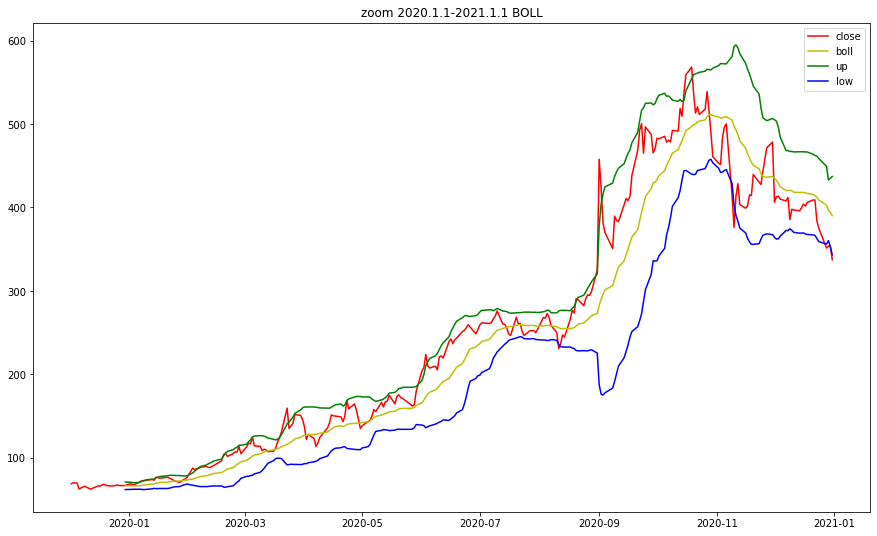

In [11]:
# 可视化，可以看出来，zm的走势处于中轨和上轨之间，中轨是支撑位，上轨是阻力位，打穿下轨之后，趋势发生逆转
# 设置画布大小
plt.figure(figsize=[15,9])

# 画收盘价线，红色
plt.plot(df['ZM'],c='r',label='close')

# 画出boll中轨，黄色
plt.plot(df['ma20'],c='y',label='boll')
            
# 画上轨，绿色
plt.plot(df['up'],c='g',label='up')

# 画下轨，蓝色
plt.plot(df['down'],c='b',label='low')

plt.title('zoom 2020.1.1-2021.1.1 BOLL')
# 画图
plt.legend()
plt.show()

In [12]:
# 计算前一天的收盘价
df['pre_close']=df['ZM'].shift(1)
df

,ZM,ma20,std20,up,down,pre_close
Date,,,,,,
2019-12-02,68.930000,NaN,NaN,NaN,NaN,NaN
2019-12-03,70.019997,NaN,NaN,NaN,NaN,68.930000
2019-12-04,69.959999,NaN,NaN,NaN,NaN,70.019997
2019-12-05,69.669998,NaN,NaN,NaN,NaN,69.959999
2019-12-06,62.740002,NaN,NaN,NaN,NaN,69.669998
...,...,...,...,...,...,...
2020-12-24,375.170013,408.846999,24.850780,458.548559,359.145438,383.880005
2020-12-28,351.390015,402.836000,23.365669,449.567337,356.104663,375.170013
2020-12-29,353.750000,396.605501,18.212655,433.030811,360.180190,351.390015


In [13]:
# 当收盘价突破上轨的时候，买入
df.loc[(df['ZM'] >df['up'])  &( df['up'] >df['pre_close']),'Buy']=1
df

,ZM,ma20,std20,up,down,pre_close,Buy
Date,,,,,,,
2019-12-02,68.930000,NaN,NaN,NaN,NaN,NaN,NaN
2019-12-03,70.019997,NaN,NaN,NaN,NaN,68.930000,NaN
2019-12-04,69.959999,NaN,NaN,NaN,NaN,70.019997,NaN
2019-12-05,69.669998,NaN,NaN,NaN,NaN,69.959999,NaN
2019-12-06,62.740002,NaN,NaN,NaN,NaN,69.669998,NaN
...,...,...,...,...,...,...,...
2020-12-24,375.170013,408.846999,24.850780,458.548559,359.145438,383.880005,NaN
2020-12-28,351.390015,402.836000,23.365669,449.567337,356.104663,375.170013,NaN
2020-12-29,353.750000,396.605501,18.212655,433.030811,360.180190,351.390015,NaN


In [14]:
# 当收盘价突破下轨的时候卖出
df.loc[(df['ZM'] <df['down'])  &( df['down'] <df['pre_close']),'Sell']=1
df

,ZM,ma20,std20,up,down,pre_close,Buy,Sell
Date,,,,,,,,
2019-12-02,68.930000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-12-03,70.019997,NaN,NaN,NaN,NaN,68.930000,NaN,NaN
2019-12-04,69.959999,NaN,NaN,NaN,NaN,70.019997,NaN,NaN
2019-12-05,69.669998,NaN,NaN,NaN,NaN,69.959999,NaN,NaN
2019-12-06,62.740002,NaN,NaN,NaN,NaN,69.669998,NaN,NaN
...,...,...,...,...,...,...,...,...
2020-12-24,375.170013,408.846999,24.850780,458.548559,359.145438,383.880005,NaN,NaN
2020-12-28,351.390015,402.836000,23.365669,449.567337,356.104663,375.170013,NaN,1.0
2020-12-29,353.750000,396.605501,18.212655,433.030811,360.180190,351.390015,NaN,NaN


In [15]:
# 买入的时间
buy_date=df[df['Buy']==1].index
buy_date

DatetimeIndex(['2020-01-07', '2020-01-08', '2020-01-15', '2020-02-03',
               '2020-02-05', '2020-02-19', '2020-03-20', '2020-03-23',
               '2020-04-23', '2020-06-01', '2020-06-03', '2020-08-20',
               '2020-08-31', '2020-09-01', '2020-10-15', '2020-10-16'],
              dtype='datetime64[ns]', name='Date', freq=None)

In [16]:
# 卖出的时间
sell_date=df[df['Sell']==1].index
sell_date

DatetimeIndex(['2020-08-11', '2020-11-09', '2020-11-10', '2020-12-28',
               '2020-12-31'],
              dtype='datetime64[ns]', name='Date', freq=None)

In [17]:
# 第一次平仓时间
sell_date1=sell_date[0]

# 第一次买入之后，找到最早的买入时间，过滤重复买入时间
buy_time=[]
for i in buy_date:
    if i <sell_date[0]:
        buy_time.append(i)
buy_time1=buy_time[0]
buy_time1

Timestamp('2020-01-07 00:00:00')

In [18]:
# 第二次平仓时间
sell_date2=sell_date[1]

# 第2次买入之后，过滤重复时间
buy_time=[]
for i in buy_date:
    if i <sell_date[1] and i >sell_date[0]:
        buy_time.append(i)
buy_time2=min(buy_time)
buy_time2

Timestamp('2020-08-20 00:00:00')

In [19]:
# 计算每天收益率
df['return']=df['ZM'].pct_change()
df

,ZM,ma20,std20,up,down,pre_close,Buy,Sell,return
Date,,,,,,,,,
2019-12-02,68.930000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-12-03,70.019997,NaN,NaN,NaN,NaN,68.930000,NaN,NaN,0.015813
2019-12-04,69.959999,NaN,NaN,NaN,NaN,70.019997,NaN,NaN,-0.000857
2019-12-05,69.669998,NaN,NaN,NaN,NaN,69.959999,NaN,NaN,-0.004145
2019-12-06,62.740002,NaN,NaN,NaN,NaN,69.669998,NaN,NaN,-0.099469
...,...,...,...,...,...,...,...,...,...
2020-12-24,375.170013,408.846999,24.850780,458.548559,359.145438,383.880005,NaN,NaN,-0.022689
2020-12-28,351.390015,402.836000,23.365669,449.567337,356.104663,375.170013,NaN,1.0,-0.063385
2020-12-29,353.750000,396.605501,18.212655,433.030811,360.180190,351.390015,NaN,NaN,0.006716


In [20]:
# 计算第1段持仓时间的收益率
df_hold1=df.loc[str(buy_time1.date()):str(sell_date[0].date()),'return']
df_hold1

Date
2020-01-07    0.022469
2020-01-08    0.009040
2020-01-09    0.000965
2020-01-10    0.006472
2020-01-13    0.012861
                ...   
2020-08-05    0.020797
2020-08-06   -0.017039
2020-08-07   -0.035489
2020-08-10   -0.033742
2020-08-11   -0.075840
Name: return, Length: 151, dtype: float64

In [21]:
# 计算第2段持仓时间的收益率
df_hold2=df.loc[str(buy_time2.date()):str(sell_date[1].date()),'return']
df_hold2

Date
2020-08-20    0.062813
2020-08-21   -0.003475
2020-08-24   -0.025545
2020-08-25    0.028907
2020-08-26    0.016630
2020-08-27   -0.001998
2020-08-28    0.015576
2020-08-31    0.086310
2020-09-01    0.407844
2020-09-02   -0.074570
2020-09-03   -0.099726
2020-09-04   -0.029975
2020-09-08   -0.051394
2020-09-09    0.110494
2020-09-10   -0.013268
2020-09-11   -0.003849
2020-09-14    0.053551
2020-09-15    0.018413
2020-09-16   -0.006741
2020-09-17    0.012140
2020-09-18    0.061979
2020-09-21    0.067787
2020-09-22    0.051508
2020-09-23    0.016098
2020-09-24   -0.071025
2020-09-25    0.067788
2020-09-28   -0.017805
2020-09-29   -0.045442
2020-09-30    0.009903
2020-10-01    0.027398
2020-10-02   -0.001573
2020-10-05    0.006511
2020-10-06   -0.014669
2020-10-07    0.004935
2020-10-08   -0.004286
2020-10-09    0.028963
2020-10-12   -0.001767
2020-10-13    0.055438
2020-10-14   -0.018389
2020-10-15    0.053314
2020-10-16    0.042133
2020-10-19    0.016708
2020-10-20   -0.055108
2020-1

In [22]:
# 持有总时间的收益率
all_hold=pd.concat([df_hold1,df_hold2],axis=0)
all_hold

Date
2020-01-07    0.022469
2020-01-08    0.009040
2020-01-09    0.000965
2020-01-10    0.006472
2020-01-13    0.012861
                ...   
2020-11-03   -0.003289
2020-11-04    0.071294
2020-11-05    0.026938
2020-11-06    0.006804
2020-11-09   -0.173702
Name: return, Length: 208, dtype: float64

In [23]:
df_new=df[df.index>='2020-1-1']
df_new

,ZM,ma20,std20,up,down,pre_close,Buy,Sell,return
Date,,,,,,,,,
2020-01-02,68.720001,66.395500,2.133434,70.662367,62.128633,68.040001,NaN,NaN,0.009994
2020-01-03,67.279999,66.261500,1.976131,70.213763,62.309237,68.720001,NaN,NaN,-0.020955
2020-01-06,70.320000,66.294000,2.039469,70.372938,62.215062,67.279999,NaN,NaN,0.045184
2020-01-07,71.900002,66.752000,2.219890,71.191780,62.312220,70.320000,1.0,NaN,0.022469
2020-01-08,72.550003,67.082500,2.558816,72.200131,61.964869,71.900002,1.0,NaN,0.009040
...,...,...,...,...,...,...,...,...,...
2020-12-24,375.170013,408.846999,24.850780,458.548559,359.145438,383.880005,NaN,NaN,-0.022689
2020-12-28,351.390015,402.836000,23.365669,449.567337,356.104663,375.170013,NaN,1.0,-0.063385
2020-12-29,353.750000,396.605501,18.212655,433.030811,360.180190,351.390015,NaN,NaN,0.006716


In [24]:
month_last_price=pd.DataFrame(index=range(1,13),columns=['monthclose'])
# 计算1-12月，每月最后一天的收盘价，用于计算下个月的月度收益率
for i in range(1,13):
#     得到每个月的df
    temp_df=df_new.loc[df_new.index.month==i,]
#     得到每个月最后一天的收盘价
    temp_price=temp_df.iloc[-1,0]
# 加到空df之中
    month_last_price.iloc[i-1,0]=temp_price

# 每个月的开盘价就是上个月的收盘价
month_last_price['monthopen']=month_last_price['monthclose'].shift(1)
print(month_last_price)

   monthclose monthopen
1        76.3       NaN
2         105      76.3
3      146.12       105
4      135.17    146.12
5      179.48    135.17
6      253.54    179.48
7      253.91    253.54
8       325.1    253.91
9      470.11     325.1
10     460.91    470.11
11     478.36    460.91
12     337.32    478.36


In [25]:
# 第一个月的收盘价开盘价是去年最后一个交易日的价格，直接获取该价格
jan=pdr.DataReader(t,data_source = 'yahoo',start='2019-12-31',end='2019-12-31')['Adj Close']
jan

Date
2019-12-31    68.040001
Name: Adj Close, dtype: float64

In [26]:
# 把一月开盘价换成去年最后一天收盘价
month_last_price.iloc[0,1]=jan[-1]
month_last_price

,monthclose,monthopen
1,76.3,68.04
2,105,76.3
3,146.12,105
4,135.17,146.12
5,179.48,135.17
6,253.54,179.48
7,253.91,253.54
8,325.1,253.91
9,470.11,325.1
10,460.91,470.11


In [27]:
# 月度收益率
month_last_price['return']=month_last_price['monthclose']/month_last_price['monthopen']
month_last_price

,monthclose,monthopen,return
1,76.3,68.04,1.1214
2,105,76.3,1.37615
3,146.12,105,1.39162
4,135.17,146.12,0.925062
5,179.48,135.17,1.32781
6,253.54,179.48,1.41264
7,253.91,253.54,1.00146
8,325.1,253.91,1.28037
9,470.11,325.1,1.44605
10,460.91,470.11,0.98043


In [28]:
# boll持有总时间的收益率
all_hold=pd.concat([df_hold1,df_hold2],axis=0)
all_hold

Date
2020-01-07    0.022469
2020-01-08    0.009040
2020-01-09    0.000965
2020-01-10    0.006472
2020-01-13    0.012861
                ...   
2020-11-03   -0.003289
2020-11-04    0.071294
2020-11-05    0.026938
2020-11-06    0.006804
2020-11-09   -0.173702
Name: return, Length: 208, dtype: float64

In [29]:
# boll的月度收益率和买入持有收益率的不同点是1/8/11/12，4个月不同，其中12月是没有交易，剩下的月份收益率是相同的
# 1/8/11三个月的月度收益率用每天平均收益率*交易日数量来计算
three_month_return=[]
for i in [1,8,11]:
#     得到三个月的df
    temp_df=all_hold.loc[all_hold.index.month==i]
#     三个月的平均收益率
    temp_df_return=temp_df.mean()
#     计算这个这个月的交易日个数
    temp_num=len(df_new[df_new.index.month==i])
#     月度收益率就是平均值*交易日个数
    three_month_return.append(temp_df_return*temp_num)

three_month_return

[0.0997581123742472, 0.12730932442279824, -0.2970530502479503]

In [30]:
boll_month_return=month_last_price.loc[:,['return']].copy()

boll_month_return

,return
1,1.1214
2,1.37615
3,1.39162
4,0.925062
5,1.32781
6,1.41264
7,1.00146
8,1.28037
9,1.44605
10,0.98043


In [31]:
boll_month_return.iloc[0,0]=three_month_return[0]
boll_month_return.iloc[7,0]=three_month_return[1]
boll_month_return.iloc[10,0]=three_month_return[2]
boll_month_return.iloc[11,0]=0
boll_month_return

,return
1,0.0997581
2,1.37615
3,1.39162
4,0.925062
5,1.32781
6,1.41264
7,1.00146
8,0.127309
9,1.44605
10,0.98043


In [32]:
hold_month_return=month_last_price.iloc[:,-1]
month_return_all=pd.concat([boll_month_return,hold_month_return],axis=1)
month_return_all.columns=['boll_month_return','hold_month_return']
month_return_all

,boll_month_return,hold_month_return
1,0.0997581,1.1214
2,1.37615,1.37615
3,1.39162,1.39162
4,0.925062,0.925062
5,1.32781,1.32781
6,1.41264,1.41264
7,1.00146,1.00146
8,0.127309,1.28037
9,1.44605,1.44605
10,0.98043,0.98043


In [33]:
#进行fama french 4 factors 测试
from pandas_datareader.famafrench import get_available_datasets

In [34]:
get_available_datasets()

['F-F_Research_Data_Factors',
 'F-F_Research_Data_Factors_weekly',
 'F-F_Research_Data_Factors_daily',
 'F-F_Research_Data_5_Factors_2x3',
 'F-F_Research_Data_5_Factors_2x3_daily',
 'Portfolios_Formed_on_ME',
 'Portfolios_Formed_on_ME_Wout_Div',
 'Portfolios_Formed_on_ME_Daily',
 'Portfolios_Formed_on_BE-ME',
 'Portfolios_Formed_on_BE-ME_Wout_Div',
 'Portfolios_Formed_on_BE-ME_Daily',
 'Portfolios_Formed_on_OP',
 'Portfolios_Formed_on_OP_Wout_Div',
 'Portfolios_Formed_on_OP_Daily',
 'Portfolios_Formed_on_INV',
 'Portfolios_Formed_on_INV_Wout_Div',
 'Portfolios_Formed_on_INV_Daily',
 '6_Portfolios_2x3',
 '6_Portfolios_2x3_Wout_Div',
 '6_Portfolios_2x3_weekly',
 '6_Portfolios_2x3_daily',
 '25_Portfolios_5x5',
 '25_Portfolios_5x5_Wout_Div',
 '25_Portfolios_5x5_Daily',
 '100_Portfolios_10x10',
 '100_Portfolios_10x10_Wout_Div',
 '100_Portfolios_10x10_Daily',
 '6_Portfolios_ME_OP_2x3',
 '6_Portfolios_ME_OP_2x3_Wout_Div',
 '6_Portfolios_ME_OP_2x3_daily',
 '25_Portfolios_ME_OP_5x5',
 '25_Portf

In [35]:
ff=pdr.DataReader('F-F_Research_Data_Factors','famafrench',start='2020-1-1',end="2020-12")[0]
ff

,Mkt-RF,SMB,HML,RF
Date,,,,
2020-01,-0.11,-3.08,-6.27,0.13
2020-02,-8.13,1.02,-3.92,0.12
2020-03,-13.38,-5.03,-13.96,0.12
2020-04,13.65,2.75,-1.39,0.00
2020-05,5.58,2.49,-5.05,0.01
2020-06,2.46,2.71,-2.35,0.01
2020-07,5.77,-2.18,-1.39,0.01
2020-08,7.63,-0.25,-2.94,0.01
2020-09,-3.63,0.06,-2.51,0.01


In [36]:
month_return_all.index=ff.index

In [37]:
df4 = pd.concat([month_return_all,ff],axis=1)
df4

,boll_month_return,hold_month_return,Mkt-RF,SMB,HML,RF
Date,,,,,,
2020-01,0.0997581,1.1214,-0.11,-3.08,-6.27,0.13
2020-02,1.37615,1.37615,-8.13,1.02,-3.92,0.12
2020-03,1.39162,1.39162,-13.38,-5.03,-13.96,0.12
2020-04,0.925062,0.925062,13.65,2.75,-1.39,0.00
2020-05,1.32781,1.32781,5.58,2.49,-5.05,0.01
2020-06,1.41264,1.41264,2.46,2.71,-2.35,0.01
2020-07,1.00146,1.00146,5.77,-2.18,-1.39,0.01
2020-08,0.127309,1.28037,7.63,-0.25,-2.94,0.01
2020-09,1.44605,1.44605,-3.63,0.06,-2.51,0.01


In [38]:
mm=pdr.DataReader('F-F_Momentum_Factor','famafrench',start='2020-01',end="2020-12")[0]
type(mm)

pandas.core.frame.DataFrame

In [39]:
list(mm.columns.values)

['Mom   ']

In [40]:
mm.columns=['Mom']

In [41]:
df5=pd.merge(df4,mm,left_index=True,right_index=True)
tickers=['hold_month_return','boll_month_return']

In [42]:
df5

,boll_month_return,hold_month_return,Mkt-RF,SMB,HML,RF,Mom
Date,,,,,,,
2020-01,0.0997581,1.1214,-0.11,-3.08,-6.27,0.13,5.43
2020-02,1.37615,1.37615,-8.13,1.02,-3.92,0.12,-0.23
2020-03,1.39162,1.39162,-13.38,-5.03,-13.96,0.12,8.55
2020-04,0.925062,0.925062,13.65,2.75,-1.39,0.00,-5.49
2020-05,1.32781,1.32781,5.58,2.49,-5.05,0.01,0.67
2020-06,1.41264,1.41264,2.46,2.71,-2.35,0.01,-0.75
2020-07,1.00146,1.00146,5.77,-2.18,-1.39,0.01,7.61
2020-08,0.127309,1.28037,7.63,-0.25,-2.94,0.01,0.51
2020-09,1.44605,1.44605,-3.63,0.06,-2.51,0.01,3.05


In [43]:
df5.describe()

,Mkt-RF,SMB,HML,RF,Mom
count,12.000000,12.000000,12.000000,12.000000,12.00000
mean,2.070000,1.101667,-2.916667,0.037500,0.13750
std,7.995792,3.303840,4.470642,0.051896,5.76935
min,-13.380000,-5.030000,-13.960000,0.000000,-12.25000
25%,-2.482500,-0.732500,-4.202500,0.010000,-2.57250
50%,3.545000,1.755000,-2.430000,0.010000,0.14000
75%,6.235000,3.172500,-1.382500,0.037500,3.64500
max,13.650000,5.480000,4.030000,0.130000,8.55000


In [44]:
sst.describe(df5['boll_month_return'])

DescribeResult(nobs=12, minmax=(-0.2970530502479503, 1.446047297833252), mean=0.8159353726230417, variance=0.4204865822803061, skewness=-0.5712132685803644, kurtosis=-1.3009488226615546)

In [45]:
sst.describe(df5['hold_month_return'])

DescribeResult(nobs=12, minmax=(0.7051593311600074, 1.446047297833252), mean=1.1671669508523226, variance=0.05671941388760151, skewness=-0.4471639300020641, kurtosis=-0.9590615768630029)

In [46]:
X=df5[['Mkt-RF','SMB','HML','Mom']]

In [47]:
X.head()

,Mkt-RF,SMB,HML,Mom
Date,,,,
2020-01,-0.11,-3.08,-6.27,5.43
2020-02,-8.13,1.02,-3.92,-0.23
2020-03,-13.38,-5.03,-13.96,8.55
2020-04,13.65,2.75,-1.39,-5.49
2020-05,5.58,2.49,-5.05,0.67


In [48]:
df5['hold_month_return-RF']=df5['hold_month_return']-df5['RF']

In [49]:
df5=df5.dropna(axis=0,how='any')
df5

,boll_month_return,hold_month_return,Mkt-RF,SMB,HML,RF,Mom,hold_month_return-RF
Date,,,,,,,,
2020-01,0.0997581,1.1214,-0.11,-3.08,-6.27,0.13,5.43,0.991399
2020-02,1.37615,1.37615,-8.13,1.02,-3.92,0.12,-0.23,1.25615
2020-03,1.39162,1.39162,-13.38,-5.03,-13.96,0.12,8.55,1.27162
2020-04,0.925062,0.925062,13.65,2.75,-1.39,0.00,-5.49,0.925062
2020-05,1.32781,1.32781,5.58,2.49,-5.05,0.01,0.67,1.31781
2020-06,1.41264,1.41264,2.46,2.71,-2.35,0.01,-0.75,1.40264
2020-07,1.00146,1.00146,5.77,-2.18,-1.39,0.01,7.61,0.991459
2020-08,0.127309,1.28037,7.63,-0.25,-2.94,0.01,0.51,1.27037
2020-09,1.44605,1.44605,-3.63,0.06,-2.51,0.01,3.05,1.43605


In [50]:
X1=sm.add_constant(X)
reg=sm.OLS(df5['hold_month_return-RF'].astype(float),X1.astype(float)).fit()
reg.summary()

E:\python\lib\site-packages\scipy\stats\stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=12
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                             
================================================================================
Dep. Variable:     hold_month_return-RF   R-squared:                       0.187
Model:                              OLS   Adj. R-squared:                 -0.278
Method:                   Least Squares   F-statistic:                    0.4022
Date:                  Fri, 12 Mar 2021   Prob (F-statistic):              0.802
Time:                          01:39:59   Log-Likelihood:                 2.5560
No. Observations:                    12   AIC:                             4.888
Df Residuals:                         7   BIC:                             7.312
Df Model:                             4                                         
Covariance Type:              nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.1209      0.165      6.790      0.000       0.731       1.511
Mkt-RF        -0.0080      0.013     -0.616      0.557      -0.039       0.023
SMB           -0.0056      0.060     -0.092      0.929      -0.148       0.137
HML           -0.0110      0.030     -0.369      0.723      -0.081       0.059
Mom           -0.0040      0.031     -0.127      0.902      -0.078       0.070
==============================================================================
Omnibus:                        0.123   Durbin-Watson:                   1.535
Prob(Omnibus):                  0.940   Jarque-Bera (JB):                0.328
Skew:                          -0.129   Prob(JB):                        0.849
Kurtosis:                       2.232   Cond. No.                         22.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [51]:
df5['boll_month_return-RF']=df5['boll_month_return']-df5['RF']

In [52]:
X1=sm.add_constant(X)
reg=sm.OLS(df5['boll_month_return-RF'].astype(float),X1.astype(float)).fit()
reg.summary()

E:\python\lib\site-packages\scipy\stats\stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=12
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                             
================================================================================
Dep. Variable:     boll_month_return-RF   R-squared:                       0.351
Model:                              OLS   Adj. R-squared:                 -0.019
Method:                   Least Squares   F-statistic:                    0.9477
Date:                  Fri, 12 Mar 2021   Prob (F-statistic):              0.490
Time:                          01:39:59   Log-Likelihood:                -8.6503
No. Observations:                    12   AIC:                             27.30
Df Residuals:                         7   BIC:                             29.73
Df Model:                             4                                         
Covariance Type:              nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.6147      0.420      1.464      0.187      -0.378       1.608
Mkt-RF        -0.0279      0.033     -0.846      0.426      -0.106       0.050
SMB            0.1456      0.154      0.948      0.375      -0.218       0.509
HML           -0.0168      0.076     -0.223      0.830      -0.195       0.162
Mom            0.0870      0.079      1.096      0.309      -0.101       0.275
==============================================================================
Omnibus:                        1.297   Durbin-Watson:                   1.146
Prob(Omnibus):                  0.523   Jarque-Bera (JB):                0.876
Skew:                          -0.610   Prob(JB):                        0.645
Kurtosis:                       2.485   Cond. No.                         22.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [53]:
sec_beta=pd.DataFrame(np.nan,index=tickers,columns=['const','Mkt-RF','SMB','HML','Mom'])
sec_beta

,const,Mkt-RF,SMB,HML,Mom
hold_month_return,NaN,NaN,NaN,NaN,NaN
boll_month_return,NaN,NaN,NaN,NaN,NaN


In [54]:
for t in tickers:
    X=df5[['Mkt-RF','SMB','HML','Mom']]
    X1=sm.add_constant(X)
    Y=df5[t]-df5['RF']
    reg=sm.OLS(Y.astype(float),X1.astype(float)).fit()
    sec_beta.loc[t,:]=reg.params
sec_beta

,const,Mkt-RF,SMB,HML,Mom
hold_month_return,1.120879,-0.007981,-0.005570,-0.010967,-0.003963
boll_month_return,0.614662,-0.027852,0.145607,-0.016819,0.087000


In [55]:
avg_mean_boll = month_return_all['boll_month_return'].mean()
avg_mean_boll

0.8159353726230417

In [56]:
avg_mean_hold = month_return_all['hold_month_return'].mean()
avg_mean_hold

1.1671669508523226

In [57]:
#买入维持的standard deviation
avg_std_hold = month_return_all['hold_month_return'].std()
avg_std_hold

0.2381583798391346

In [58]:
#使用布林线的standard deviation
avg_std_boll = month_return_all['boll_month_return'].std()
avg_std_boll

0.6484493675533242

In [59]:
#蒙特卡洛模拟收益，10000个结果
iterations=10000
rev_Boll=np.random.normal(avg_mean_boll,avg_std_boll,iterations)
rev_Boll

array([2.43616142, 1.95988383, 0.25600753, ..., 1.09873313, 0.90667585,
       1.52351089])

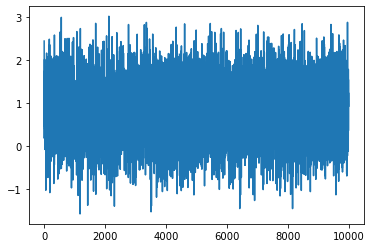

In [60]:
plt.plot(rev_Boll)
plt.show()

In [61]:
sst.describe(rev_Boll)

DescribeResult(nobs=10000, minmax=(-1.5877753749826766, 3.0134351045281527), mean=0.8176918198940776, variance=0.42565819225615115, skewness=-0.02930800292731819, kurtosis=-0.032396750483738135)

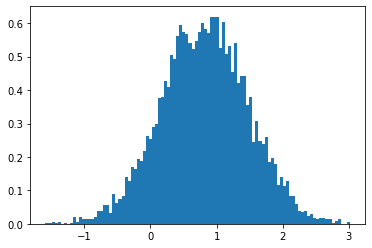

In [62]:
plt.hist(rev_Boll,bins=100,density=True)
plt.show()

In [63]:
#买入持有的蒙特卡洛模拟结果
rev_Hold=np.random.normal(avg_mean_hold,avg_std_hold,iterations)
rev_Hold

array([1.21000642, 1.21737562, 1.84367617, ..., 1.54533978, 0.92583282,
       0.87343768])

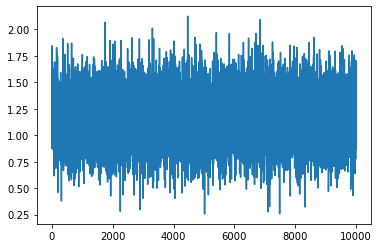

In [64]:
plt.plot(rev_Hold)
plt.show()

In [65]:
sst.describe(rev_Hold)

DescribeResult(nobs=10000, minmax=(0.2563201197182656, 2.1238387943590564), mean=1.167307969952852, variance=0.05647683283959743, skewness=-0.01022444953551537, kurtosis=0.13047621413085064)

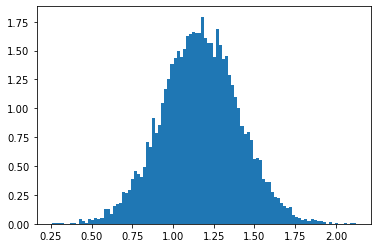

In [66]:
plt.hist(rev_Hold,bins=100,density=True)
plt.show()

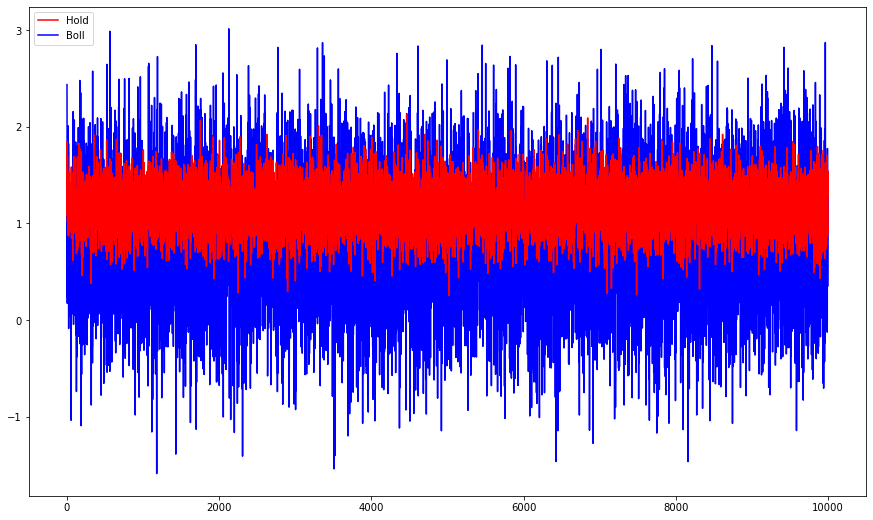

In [67]:
# 可视化,蒙特卡洛模拟的对比
# 设置画布大小
plt.figure(figsize=[15,9])

# 画买入持有的模拟，红色
plt.plot(rev_Hold,c='r',label='Hold',zorder=30)

# 画使用布林线交易的模拟，看蓝色
plt.plot(rev_Boll,c='b',label='Boll',zorder=20)
            
plt.legend()
plt.show()

In [68]:
#计算买入持有的收益
exp_rev_Hold = rev_Hold.mean()
exp_rev_Hold 

1.167307969952852

In [69]:
#计算买入持有的标准差
std_rev_Hold = rev_Hold.std()
std_rev_Hold 

0.23763666627082924

In [70]:
#计算布林线的收益
exp_rev_Boll= rev_Boll.mean()
exp_rev_Boll

0.8176918198940776

In [71]:
#计算布林线的标准差
std_rev_Boll = rev_Boll.std()
std_rev_Boll 

0.6523922335810916

In [72]:
#计算hold的夏普率,
#The Daily Treasury Yield Curve Rates are a commonly used metric for the "risk-free" rate of return. Currently, the 1-month risk-free rate is 0.19%
rfr = 0.0019
Hold_Sharpe = (exp_rev_Hold -rfr)/(std_rev_Hold)
Hold_Sharpe

4.904158891981182

In [73]:
Boll_Sharpe = (exp_rev_Boll -rfr)/(std_rev_Boll)
Boll_Sharpe

1.250462188085928

In [74]:
sec_Sharpe=pd.DataFrame(np.nan,index=['Sharpe Ratio'],columns=['Boll','Hold'])
sec_Sharpe

,Boll,Hold
Sharpe Ratio,NaN,NaN


In [75]:
sec_Sharpe['Boll'] = Boll_Sharpe
sec_Sharpe['Hold'] = Hold_Sharpe
sec_Sharpe

,Boll,Hold
Sharpe Ratio,1.250462,4.904159


In [77]:
print(month_return_all.std())

boll_month_return    0.648449
hold_month_return    0.238158
dtype: float64


In [78]:
print(std_rev_Hold,std_rev_Boll)

0.23763666627082924 0.6523922335810916
